# PCA pipeline

## 导入需要的库信息

In [1]:
#导入必需的库
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm_notebook as tqdm
import umap
import warnings
warnings.filterwarnings('ignore')
from bokeh.palettes import Category20c
#绘图设置
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[1])
sns.set_style(styles[2])
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.

Populating the interactive namespace from numpy and matplotlib


## 简单PCA示例

### 测试数据信息

###### 人为构建的测试数据维度为3，可以分为4个簇

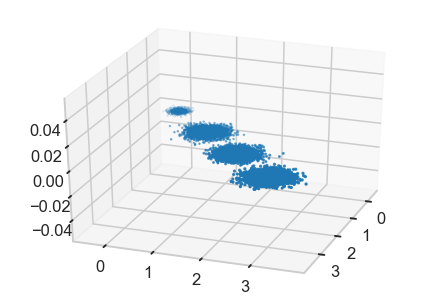

In [79]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

### 原始三维特征的方差大小

In [8]:
#n_components：PCA降维后的特征维度数目
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


### 降维：指定降低的维度

#### 将原始数据维度降低到二维对应的各维度方差大小

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]


####  降维后数据展示

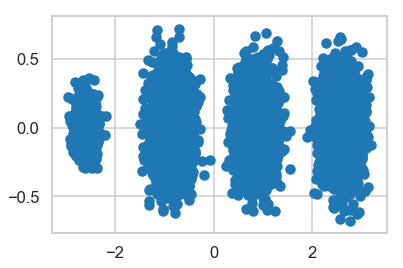

In [11]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

### 降维：指定主成分方差占比

#### 特征维度的方差占比>=99%

In [13]:
pca_proportion = PCA(n_components=0.99)
pca_proportion .fit(X)
print (pca_proportion .explained_variance_ratio_)
print (pca_proportion .explained_variance_)
print (pca_proportion .n_components_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


#### 降维后数据展示

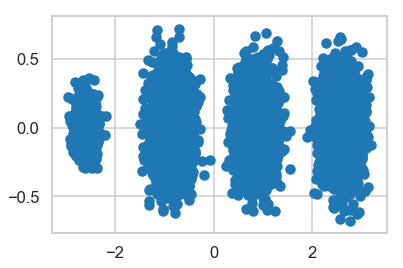

In [14]:
X_proportion  = pca_proportion .transform(X)
plt.scatter(X_proportion[:, 0], X_proportion[:, 1],marker='o')
plt.show()

## PCA、UMAP、tSNE

### 数据信息

In [83]:
!pwd

/home/songyabing/jupyter


In [82]:
original_mx_file='/home/songyabing/jupyter/scirep_sequential_qc.txt'
original_mx = pd.read_table(original_mx_file,index_col=0)
original_mx.head()

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000473358.1|MIR1302-2HG-202|1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000469289.1|MIR1302-2HG-201|843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000466430.5|AL627309.1-201|31638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ENST00000471248.1|AL627309.1-203|18221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000610542.1|AL627309.1-205|12999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
class_file='/home/songyabing/jupyter/scirep_classes.txt'
sample_class = pd.read_table(class_file,sep='\t',index_col=0)
sample_class.head()

,label
sample_id,
Sample_1S3,Colorectal Cancer
Sample_1S6,Colorectal Cancer
Sample_1S9,Colorectal Cancer
Sample_1S12,Colorectal Cancer
Sample_1S15,Colorectal Cancer


### PCA、UMAP、tSNE

In [136]:
def PCA_like_dimensionality_reduction(ax,data,sampleclass,row_num,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    
    data_columns=plot_table.index.size
    select_rows=[random.randint(0,data_columns-1) for i in range(row_num)]
    selected_df=pd.DataFrame([plot_table.iloc[i,:] for i in select_rows])
    plot_table=pd.concat((selected_df,sample_class.loc[selected_df.index]),axis=1)
    
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                    palette=np.array(Category20c[20]).reshape(4,-1).T.ravel()[:classnum],hue="class",s=200)
    plt.figure(linewidth=10)
    ax.set_title(method,fontsize=24,pad=14)
    ax.set_xlabel("First_dimension",fontsize=16,labelpad=8)
    ax.set_ylabel("Second_dimension",fontsize=16,labelpad=8)
    ax.legend(fontsize=20)

In [137]:
def visualize_effect(original_mx,sample_class,row_num=50):
    fig, ax = plt.subplots(3,1,figsize=(10, 30))
    methods=['PCA','tSNE','UMAP']
    for i,ax1 in  enumerate(ax.flatten()):
        PCA_like_dimensionality_reduction(ax1,original_mx,sample_class,row_num,method=methods[i])

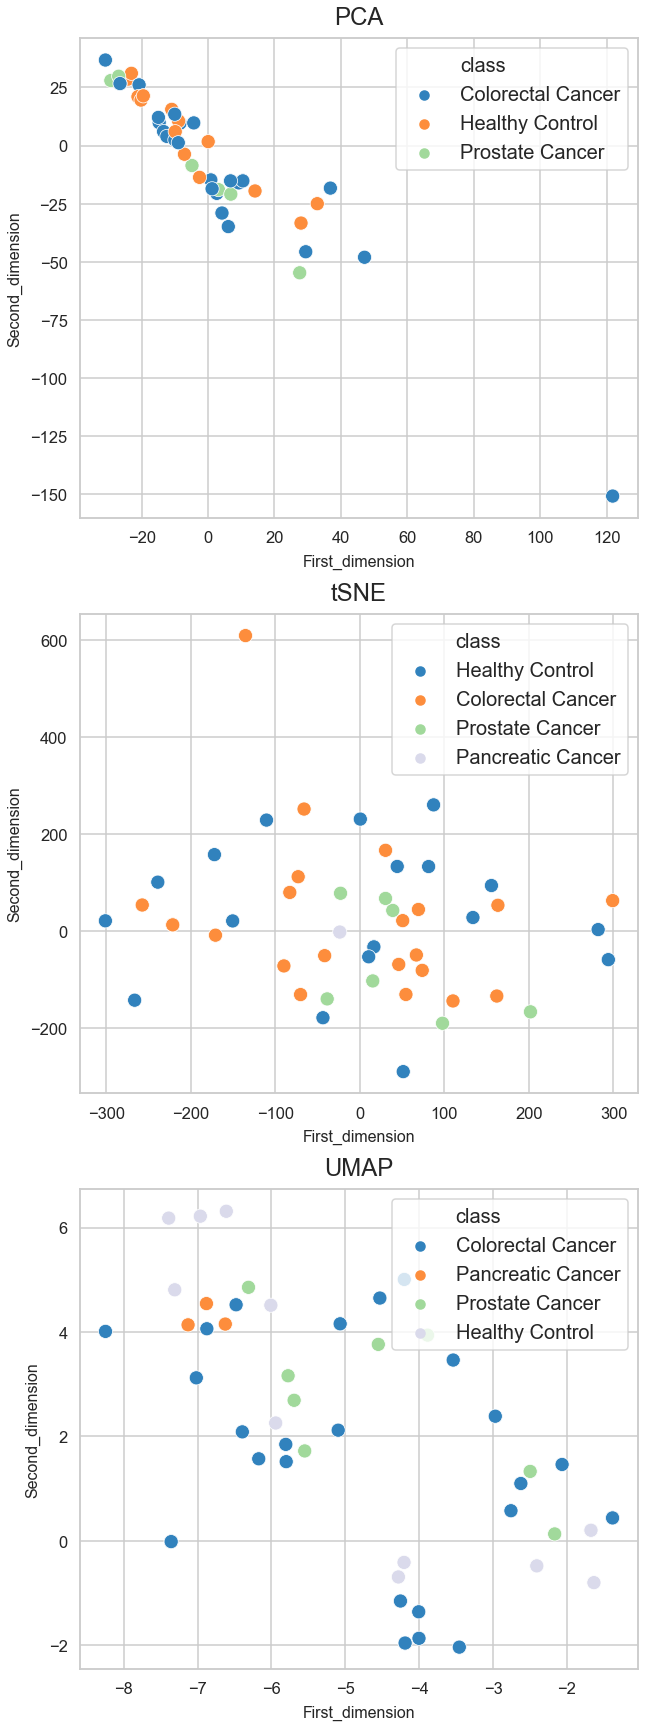

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [138]:
visualize_effect(original_mx,sample_class)

## 带有量化聚集程度的PCA|tSNE|UMAP

### 量化二分类和多分类样本的聚集程度

###### PCA、tSNE和UMAP可以直观的看到样本目前的聚集程度，但是无法量化，尤其是不容易做比较，我们提供以下函数量化二分类和多分类样本的聚集程度。数值越接近1说明同类样本越聚集。
* knn_score
* unsupervised_clustering_accuracy
* clustering_scores(asw_score、nmi_score、ari_score、uca_score)
* uca_scores

In [117]:
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes
def unsupervised_clustering_accuracy(y, y_pred):
    """
    Unsupervised Clustering Accuracy
    """
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind
def clustering_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    asw_score = silhouette_score(X, labels)
    nmi_score = NMI(labels, labels_pred)
    ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return asw_score, nmi_score, ari_score, uca_score

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score

def get_clustering_score(data,sampleclass,method = 'PCA',prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    #X_pca = transform.fit_transform(X)
    X_, y_ = X, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    #asw_score, nmi_score, ari_score, uca_score = clustering_scores(X_, y_, prediction_algorithm)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

###  带有量化聚集程度的PCA、UMAP、TSNE

In [139]:
def PCA_plot_with_uca_score_sns(ax,data,sampleclass,row_num,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    
    data_columns=plot_table.index.size
    select_rows=[random.randint(0,data_columns-1) for i in range(row_num)]
    selected_df=pd.DataFrame([plot_table.iloc[i,:] for i in select_rows])
    plot_table=pd.concat((selected_df,sample_class.loc[selected_df.index]),axis=1)
    
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                    palette=np.array(Category20c[20]).reshape(4,-1).T.ravel()[:classnum],hue="class",s=200)
    plt.figure(linewidth=10)
    ax.set_title(method,fontsize=24,pad=14)
    ax.set_xlabel("First_dimension",fontsize=16,labelpad=8)
    ax.set_ylabel("Second_dimension",fontsize=16,labelpad=8)
    ax.legend(fontsize=20)
    
    uca_score = get_clustering_score(data, sampleclass)
    ax.set_title('{0} dimension-reduction with UCA score: {1:.6f}'.format(method,uca_score))
    return uca_score

In [140]:
def visualize_effect(original_mx,sample_class,row_num=50):
    fig, ax = plt.subplots(3,1,figsize=(10, 30))
    methods=['PCA','tSNE','UMAP']
    for i,ax1 in  enumerate(ax.flatten()):
        PCA_plot_with_uca_score_sns(ax1,original_mx,sample_class,row_num,method=methods[i])

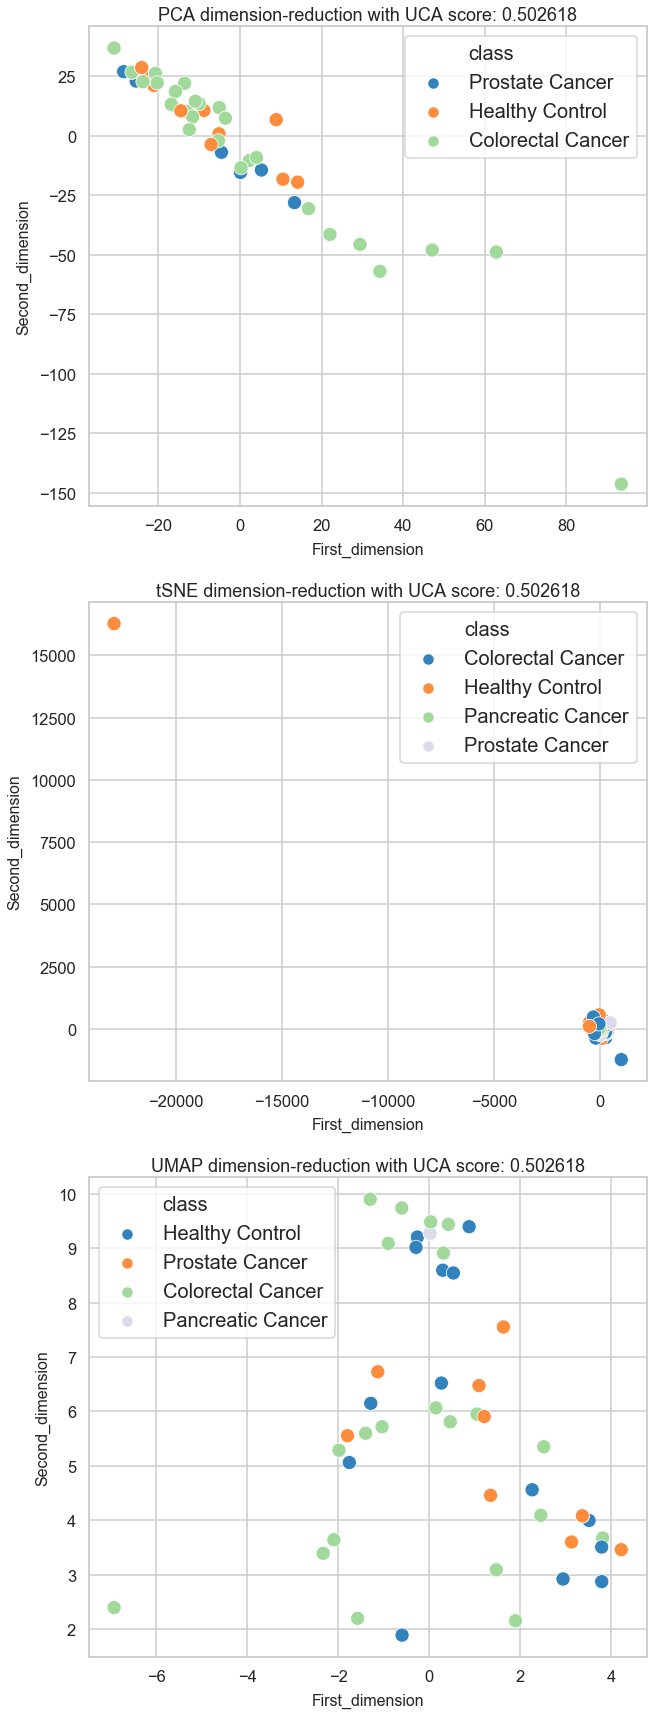

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [141]:
visualize_effect(original_mx,sample_class)

## 参考链接

### 官方文档
* [sklearn PCA官方文档](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [sklearn TSNE官方文档](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* [UMAP 官方文档](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

### 参考教程
* [用scikit-learn学习主成分分析(PCA)](https://www.cnblogs.com/pinard/p/6243025.html)
* [exseek PCA|TtSNE|UMAP](https://exseek.ncrnalab.org/)